In [1]:
import os
import numpy as np
import pandas as pd
from PIL import Image

# Paths for validation data
base_path = "/Users/jasmufin/Downloads/Aero-engine_defect-detect_new"
train_images_path = os.path.join(base_path, "images", "train")
train_labels_path = os.path.join(base_path, "labels", "train")
val_images_path = os.path.join(base_path, "images", "val")
val_labels_path = os.path.join(base_path, "labels", "val")

# Function to list files in a directory
def list_files(directory_path, file_extension):
    return [f for f in os.listdir(directory_path) if f.endswith(file_extension)]

# List training and validation image and label files
train_image_files = list_files(train_images_path, '.jpg')
train_label_files = list_files(train_labels_path, '.txt')
val_image_files = list_files(val_images_path, '.jpg')
val_label_files = list_files(val_labels_path, '.txt')

# Function to load and preprocess an image
def load_and_preprocess_image(image_path, target_size=(224, 224)):
    image = Image.open(image_path)
    image = image.resize(target_size)
    image_array = np.array(image)
    image_array = image_array / 255.0  # Normalize pixel values
    return image_array

# Function to generate data and labels
def generate_data_and_labels(image_files, images_path, labels_path):
    data = []
    labels = []
    missing_labels = []
    label_contents = []
    for image_file in image_files:
        image_path = os.path.join(images_path, image_file)
        image_data = load_and_preprocess_image(image_path)
        
        label_file = image_file.replace('.jpg', '.txt')
        label_path = os.path.join(labels_path, label_file)
        
        if not os.path.exists(label_path):
            missing_labels.append(label_file)
            continue
        
        with open(label_path, 'r') as f:
            label_content = f.read().strip()
            label_contents.append((image_file, label_file, label_content))
            
            # Assume class identifiers in label content indicate defects
            if any(cls_id in label_content for cls_id in ["1", "2", "3"]):  # Adjust based on your dataset's defect identifiers
                labels.append(1)
            else:
                labels.append(0)
        
        data.append(image_data)  # Append the processed image array
    return np.array(data), np.array(labels), missing_labels, label_contents

# Generate data and labels for training and validation
train_data, train_labels, train_missing_labels, train_label_contents = generate_data_and_labels(train_image_files, train_images_path, train_labels_path)
val_data, val_labels, val_missing_labels, val_label_contents = generate_data_and_labels(val_image_files, val_images_path, val_labels_path)

# Report missing labels
if train_missing_labels:
    print(f"Missing training labels for the following files: {train_missing_labels}")
if val_missing_labels:
    print(f"Missing validation labels for the following files: {val_missing_labels}")

# Combine train and validation label contents for display
all_label_contents = train_label_contents + val_label_contents

# Create DataFrame for displaying label contents
label_df = pd.DataFrame(all_label_contents, columns=['Image File', 'Label File', 'Label Content'])

# Display the DataFrame
print("Label contents:")
print(label_df.head(10))  # Adjust the number of rows to display as needed


/var/folders/36/5zz3lskd5hb9jtqbly8vhk_c0000gp/T/ipykernel_1844/3785704358.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Missing training labels for the following files: ['14_2.txt', '8_1.txt', '8_3.txt', '8_2.txt', '12_2.txt', '12_3.txt', '10_1.txt', '15_1.txt', '9_2.txt', '17_2.txt', '17_1.txt', '11_2.txt', '17_4.txt', '5_3.txt', '18_1.txt', '6_1.txt', '18_3.txt', '18_2.txt']
Missing validation labels for the following files: ['14_2.txt', '8_1.txt', '8_3.txt', '8_2.txt', '12_2.txt', '12_3.txt', '10_1.txt', '15_1.txt', '9_2.txt', '17_2.txt', '17_1.txt', '11_2.txt', '17_4.txt', '20_2.txt', '19_2.txt', '5_3.txt', '21_3.txt', '18_1.txt', '6_1.txt', '18_3.txt', '18_2.txt']
Label contents:
                    Image File                   Label File  \
0                 24_flip0.jpg                 24_flip0.txt   
1  2023-04-06 19-35-43-684.jpg  2023-04-06 19-35-43-684.txt   
2                  10_flip.jpg                  10_flip.txt   
3                   6_rot1.jpg                   6_rot1.txt   
4                   7_rot1.jpg                   7_rot1.txt   
5                  11_flip.jpg                  

Missing training labels for the following files: ['14_2.txt', '8_1.txt', '8_3.txt', '8_2.txt', '12_2.txt', '12_3.txt', '10_1.txt', '15_1.txt', '9_2.txt', '17_2.txt', '17_1.txt', '11_2.txt', '17_4.txt', '5_3.txt', '18_1.txt', '6_1.txt', '18_3.txt', '18_2.txt']
Missing validation labels for the following files: ['14_2.txt', '8_1.txt', '8_3.txt', '8_2.txt', '12_2.txt', '12_3.txt', '10_1.txt', '15_1.txt', '9_2.txt', '17_2.txt', '17_1.txt', '11_2.txt', '17_4.txt', '20_2.txt', '19_2.txt', '5_3.txt', '21_3.txt', '18_1.txt', '6_1.txt', '18_3.txt', '18_2.txt']
Label contents:
                    Image File                   Label File  \
0                 24_flip0.jpg                 24_flip0.txt   
1  2023-04-06 19-35-43-684.jpg  2023-04-06 19-35-43-684.txt   
2                  10_flip.jpg                  10_flip.txt   
3                   6_rot1.jpg                   6_rot1.txt   
4                   7_rot1.jpg                   7_rot1.txt   
5                  11_flip.jpg                  

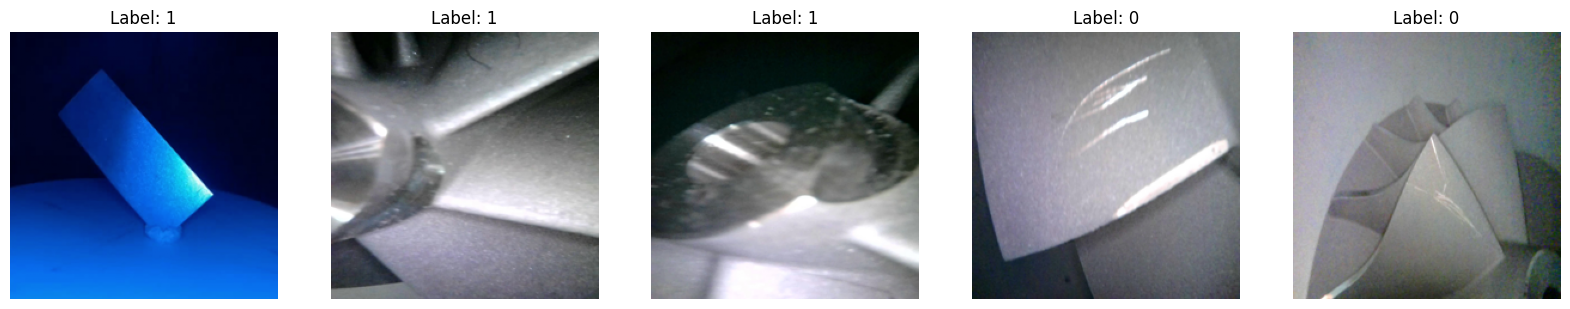

Visualizing 5 random samples from the validation dataset:


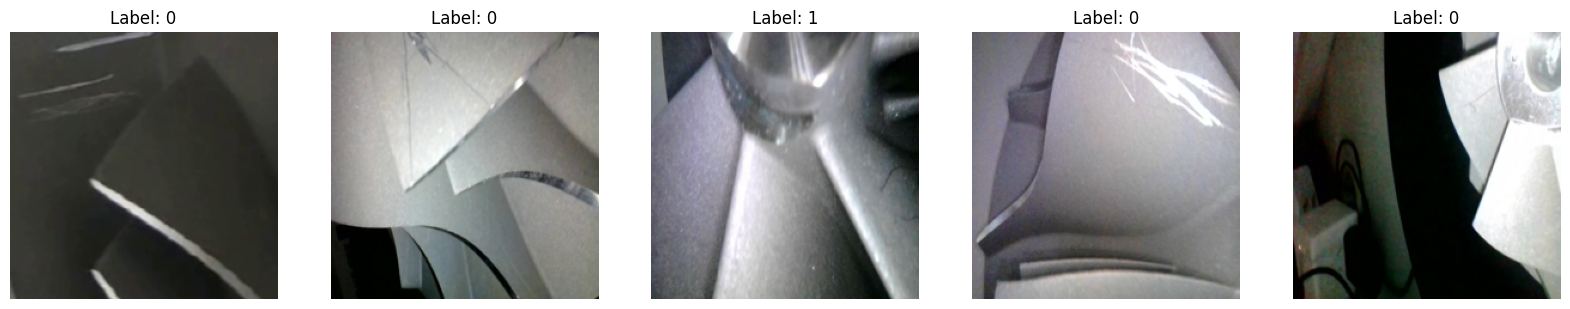

Displaying a few samples with their labels from training data:
Sample 1: Label = 1, Content = (224, 224, 3)
Sample 2: Label = 0, Content = (224, 224, 3)
Sample 3: Label = 0, Content = (224, 224, 3)
Sample 4: Label = 0, Content = (224, 224, 3)
Sample 5: Label = 0, Content = (224, 224, 3)
Displaying a few samples with their labels from validation data:
Sample 1: Label = 0, Content = (224, 224, 3)
Sample 2: Label = 0, Content = (224, 224, 3)
Sample 3: Label = 0, Content = (224, 224, 3)
Sample 4: Label = 0, Content = (224, 224, 3)
Sample 5: Label = 1, Content = (224, 224, 3)
Displaying the content of some label files:
Image file: 24_flip0.jpg, Label file: 24_flip0.txt, Content: 3 0.887714 0.736937 0.081801 0.299437
Image file: 2023-04-06 19-35-43-684.jpg, Label file: 2023-04-06 19-35-43-684.txt, Content: 0 0.387213 0.298347 0.089080 0.127965
0 0.485273 0.496405 0.101293 0.107117
0 0.446839 0.588066 0.129310 0.116463
0 0.537716 0.635514 0.068247 0.073329
Image file: 10_flip.jpg, Label file:

In [4]:
import os
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt

# Paths for training and validation data
base_path = "/Users/jasmufin/Downloads/Aero-engine_defect-detect_new"
train_images_path = os.path.join(base_path, "images", "train")
train_labels_path = os.path.join(base_path, "labels", "train")
val_images_path = os.path.join(base_path, "images", "val")
val_labels_path = os.path.join(base_path, "labels", "val")

# Function to list files in a directory
def list_files(directory_path, file_extension):
    return [f for f in os.listdir(directory_path) if f.endswith(file_extension)]

# List training and validation image and label files
train_image_files = list_files(train_images_path, '.jpg')
train_label_files = list_files(train_labels_path, '.txt')
val_image_files = list_files(val_images_path, '.jpg')
val_label_files = list_files(val_labels_path, '.txt')

# Function to load and preprocess an image
def load_and_preprocess_image(image_path, target_size=(224, 224)):
    image = Image.open(image_path)
    image = image.resize(target_size)
    image_array = np.array(image)
    image_array = image_array / 255.0  # Normalize pixel values
    return image_array

# Function to generate data and labels
def generate_data_and_labels(image_files, images_path, labels_path):
    data = []
    labels = []
    missing_labels = []
    label_contents = []
    for image_file in image_files:
        image_path = os.path.join(images_path, image_file)
        image_data = load_and_preprocess_image(image_path)
        
        label_file = image_file.replace('.jpg', '.txt')
        label_path = os.path.join(labels_path, label_file)
        
        if not os.path.exists(label_path):
            missing_labels.append(label_file)
            continue
        
        with open(label_path, 'r') as f:
            label_content = f.read().strip()
            label_contents.append((image_file, label_file, label_content))
            
            # Assume class identifiers in label content indicate defects
            # Adjust based on your dataset's defect identifiers
            if any(cls_id in label_content.split()[0] for cls_id in ["1", "2", "3"]):
                labels.append(1)
            else:
                labels.append(0)
        
        data.append(image_data)  # Append the processed image array
    return np.array(data), np.array(labels), missing_labels, label_contents

# Generate data and labels for training and validation
train_data, train_labels, train_missing_labels, train_label_contents = generate_data_and_labels(train_image_files, train_images_path, train_labels_path)
val_data, val_labels, val_missing_labels, val_label_contents = generate_data_and_labels(val_image_files, val_images_path, val_labels_path)

# Report missing labels
if train_missing_labels:
    print(f"Missing training labels for the following files: {train_missing_labels}")
if val_missing_labels:
    print(f"Missing validation labels for the following files: {val_missing_labels}")

# Remove entries with missing labels from data and labels
train_data = [data for data, label in zip(train_data, train_labels) if label not in train_missing_labels]
train_labels = [label for label in train_labels if label not in train_missing_labels]
val_data = [data for data, label in zip(val_data, val_labels) if label not in val_missing_labels]
val_labels = [label for label in val_labels if label not in val_missing_labels]

# Convert lists to numpy arrays
train_data = np.array(train_data)
train_labels = np.array(train_labels)
val_data = np.array(val_data)
val_labels = np.array(val_labels)

# Combine train and validation label contents for display
all_label_contents = train_label_contents + val_label_contents

# Create DataFrame for displaying label contents
label_df = pd.DataFrame(all_label_contents, columns=['Image File', 'Label File', 'Label Content'])

# Display the DataFrame
print("Label contents:")
print(label_df.head(10))  # Adjust the number of rows to display as needed

# Check class distribution
train_class_distribution = pd.Series(train_labels).value_counts()
val_class_distribution = pd.Series(val_labels).value_counts()
print(f"Training class distribution:\n{train_class_distribution}")
print(f"Validation class distribution:\n{val_class_distribution}")

# Print dataset shapes
print(f"Training data shape: {train_data.shape}")
print(f"Training labels shape: {train_labels.shape}")
print(f"Validation data shape: {val_data.shape}")
print(f"Validation labels shape: {val_labels.shape}")

# Visualize the training dataset
print("Visualizing 5 random samples from the training dataset:")
fig, axes = plt.subplots(1, 5, figsize=(20, 4))
for i, ax in enumerate(axes):
    index = np.random.choice(len(train_data))
    ax.imshow(train_data[index])
    ax.set_title(f"Label: {train_labels[index]}")
    ax.axis('off')
plt.show()

# Visualize the validation dataset
print("Visualizing 5 random samples from the validation dataset:")
fig, axes = plt.subplots(1, 5, figsize=(20, 4))
for i, ax in enumerate(axes):
    index = np.random.choice(len(val_data))
    ax.imshow(val_data[index])
    ax.set_title(f"Label: {val_labels[index]}")
    ax.axis('off')
plt.show()

# Print a few samples to understand the labels
print("Displaying a few samples with their labels from training data:")
for i in range(5):
    index = np.random.choice(len(train_data))
    print(f"Sample {i + 1}: Label = {train_labels[index]}, Content = {train_data[index].shape}")

print("Displaying a few samples with their labels from validation data:")
for i in range(5):
    index = np.random.choice(len(val_data))
    print(f"Sample {i + 1}: Label = {val_labels[index]}, Content = {val_data[index].shape}")

# Displaying the label contents to verify correct labeling
print("Displaying the content of some label files:")
for i in range(5):
    image_file, label_file, label_content = train_label_contents[i]
    print(f"Image file: {image_file}, Label file: {label_file}, Content: {label_content}")



2024-07-16 06:50:56.678754: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Missing training labels for the following files: ['14_2.txt', '8_1.txt', '8_3.txt', '8_2.txt', '12_2.txt', '12_3.txt', '10_1.txt', '15_1.txt', '9_2.txt', '17_2.txt', '17_1.txt', '11_2.txt', '17_4.txt', '5_3.txt', '18_1.txt', '6_1.txt', '18_3.txt', '18_2.txt']
Missing validation labels for the following files: ['14_2.txt', '8_1.txt', '8_3.txt', '8_2.txt', '12_2.txt', '12_3.txt', '10_1.txt', '15_1.txt', '9_2.txt', '17_2.txt', '17_1.txt', '11_2.txt', '17_4.txt', '20_2.txt', '19_2.txt', '5_3.txt', '21_3.txt', '18_1.txt', '6_1.txt', '18_3.txt', '18_2.txt']
Training class distribution:
0    125
1    114
Name: count, dtype: int64
Validation class distribution:
0    33
1    19
Name: count, dtype: int64
Training data shape: (239, 224, 224, 3)
Training labels shape: (239,)
Validation data shape: (52, 224, 224, 3)
Validation labels shape: (52,)
Visualizing 5 random samples from the training dataset:


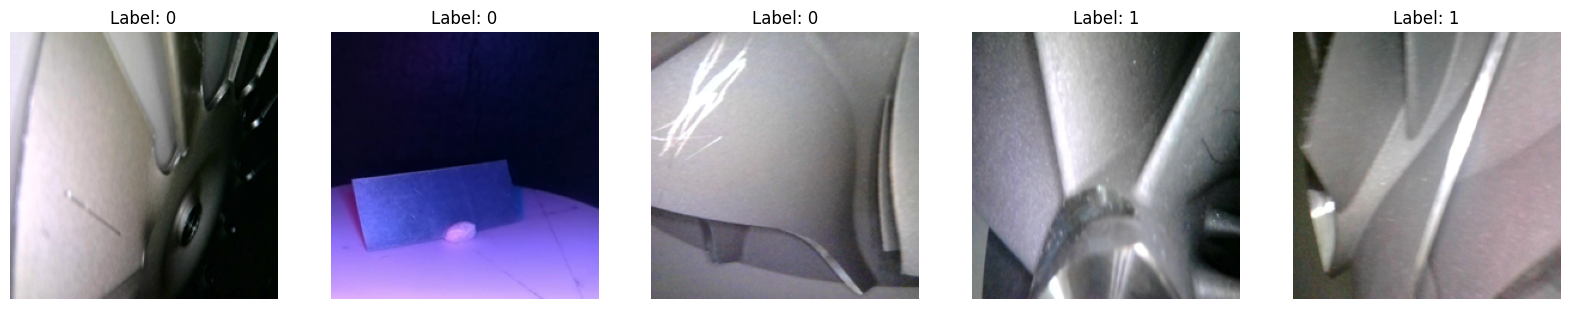

Visualizing 5 random samples from the validation dataset:


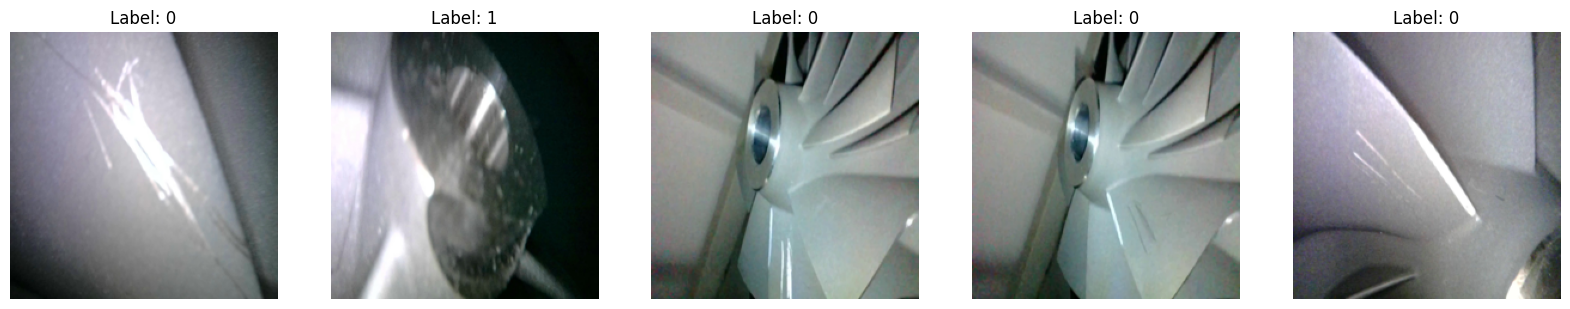

Displaying a few samples with their labels from training data:
Sample 1: Label = 0, Content = (224, 224, 3)
Sample 2: Label = 1, Content = (224, 224, 3)
Sample 3: Label = 0, Content = (224, 224, 3)
Sample 4: Label = 0, Content = (224, 224, 3)
Sample 5: Label = 1, Content = (224, 224, 3)
Displaying a few samples with their labels from validation data:
Sample 1: Label = 1, Content = (224, 224, 3)
Sample 2: Label = 0, Content = (224, 224, 3)
Sample 3: Label = 0, Content = (224, 224, 3)
Sample 4: Label = 0, Content = (224, 224, 3)
Sample 5: Label = 1, Content = (224, 224, 3)
Displaying the content of some label files:
Image file: 24_flip0.jpg, Label file: 24_flip0.txt, Content: 3 0.887714 0.736937 0.081801 0.299437
Image file: 2023-04-06 19-35-43-684.jpg, Label file: 2023-04-06 19-35-43-684.txt, Content: 0 0.387213 0.298347 0.089080 0.127965
0 0.485273 0.496405 0.101293 0.107117
0 0.446839 0.588066 0.129310 0.116463
0 0.537716 0.635514 0.068247 0.073329
Image file: 10_flip.jpg, Label file:

/Users/jasmufin/Library/Python/3.12/lib/python/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.5060 - loss: 5.6831 - val_accuracy: 0.6346 - val_loss: 0.9747
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.5397 - loss: 0.9423 - val_accuracy: 0.3846 - val_loss: 0.6908
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.5799 - loss: 0.6751 - val_accuracy: 0.7115 - val_loss: 0.6133
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.6379 - loss: 0.6267 - val_accuracy: 0.3654 - val_loss: 1.0443
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.6231 - loss: 0.6385 - val_accuracy: 0.7885 - val_loss: 0.5562
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - accuracy: 0.7687 - loss: 0.5152 - val_accuracy: 0.7885 - val_loss: 0.4465
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 15s 2s/step - accuracy: 0.8255 - loss: 0.4326 - val_accuracy: 0.7692 - val_loss: 0.4980
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 15s 2s/step - accuracy: 0.8834 - loss: 0.3573 - val_accuracy: 0.8462 - val_loss: 0.7584
Epoch 9/

In [5]:
import os
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical

# Paths for training and validation data
base_path = "/Users/jasmufin/Downloads/Aero-engine_defect-detect_new"
train_images_path = os.path.join(base_path, "images", "train")
train_labels_path = os.path.join(base_path, "labels", "train")
val_images_path = os.path.join(base_path, "images", "val")
val_labels_path = os.path.join(base_path, "labels", "val")

# Function to list files in a directory
def list_files(directory_path, file_extension):
    return [f for f in os.listdir(directory_path) if f.endswith(file_extension)]

# List training and validation image and label files
train_image_files = list_files(train_images_path, '.jpg')
train_label_files = list_files(train_labels_path, '.txt')
val_image_files = list_files(val_images_path, '.jpg')
val_label_files = list_files(val_labels_path, '.txt')

# Function to load and preprocess an image
def load_and_preprocess_image(image_path, target_size=(224, 224)):
    image = Image.open(image_path)
    image = image.resize(target_size)
    image_array = np.array(image)
    image_array = image_array / 255.0  # Normalize pixel values
    return image_array

# Function to generate data and labels
def generate_data_and_labels(image_files, images_path, labels_path):
    data = []
    labels = []
    missing_labels = []
    label_contents = []
    for image_file in image_files:
        image_path = os.path.join(images_path, image_file)
        image_data = load_and_preprocess_image(image_path)
        
        label_file = image_file.replace('.jpg', '.txt')
        label_path = os.path.join(labels_path, label_file)
        
        if not os.path.exists(label_path):
            missing_labels.append(label_file)
            continue
        
        with open(label_path, 'r') as f:
            label_content = f.read().strip()
            label_contents.append((image_file, label_file, label_content))
            
            # Convert to binary label
            if any(cls_id in label_content.split()[0] for cls_id in ["1", "2", "3"]):
                labels.append(1)
            else:
                labels.append(0)
        
        data.append(image_data)
    return np.array(data), np.array(labels), missing_labels, label_contents

# Generate data and labels for training and validation
train_data, train_labels, train_missing_labels, train_label_contents = generate_data_and_labels(train_image_files, train_images_path, train_labels_path)
val_data, val_labels, val_missing_labels, val_label_contents = generate_data_and_labels(val_image_files, val_images_path, val_labels_path)

# Report missing labels
if train_missing_labels:
    print(f"Missing training labels for the following files: {train_missing_labels}")
if val_missing_labels:
    print(f"Missing validation labels for the following files: {val_missing_labels}")

# Print class distribution
print(f"Training class distribution:\n{pd.Series(train_labels).value_counts()}")
print(f"Validation class distribution:\n{pd.Series(val_labels).value_counts()}")

# Print dataset shapes
print(f"Training data shape: {train_data.shape}")
print(f"Training labels shape: {train_labels.shape}")
print(f"Validation data shape: {val_data.shape}")
print(f"Validation labels shape: {val_labels.shape}")

# Visualize the training dataset
print("Visualizing 5 random samples from the training dataset:")
fig, axes = plt.subplots(1, 5, figsize=(20, 4))
for i, ax in enumerate(axes):
    index = np.random.choice(len(train_data))
    ax.imshow(train_data[index])
    ax.set_title(f"Label: {train_labels[index]}")
    ax.axis('off')
plt.show()

# Visualize the validation dataset
print("Visualizing 5 random samples from the validation dataset:")
fig, axes = plt.subplots(1, 5, figsize=(20, 4))
for i, ax in enumerate(axes):
    index = np.random.choice(len(val_data))
    ax.imshow(val_data[index])
    ax.set_title(f"Label: {val_labels[index]}")
    ax.axis('off')
plt.show()

# Print a few samples to understand the labels
print("Displaying a few samples with their labels from training data:")
for i in range(5):
    index = np.random.choice(len(train_data))
    print(f"Sample {i + 1}: Label = {train_labels[index]}, Content = {train_data[index].shape}")

print("Displaying a few samples with their labels from validation data:")
for i in range(5):
    index = np.random.choice(len(val_data))
    print(f"Sample {i + 1}: Label = {val_labels[index]}, Content = {val_data[index].shape}")

# Displaying the label contents to verify correct labeling
print("Displaying the content of some label files:")
for i in range(5):
    image_file, label_file, label_content = train_label_contents[i]
    print(f"Image file: {image_file}, Label file: {label_file}, Content: {label_content}")

# Convert labels to categorical format
train_labels_categorical = to_categorical(train_labels, num_classes=2)
val_labels_categorical = to_categorical(val_labels, num_classes=2)

# Define a simple CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(2, activation='softmax')  # For binary classification, 2 output neurons
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_data, train_labels_categorical, epochs=10, batch_size=32, validation_data=(val_data, val_labels_categorical))

# Evaluate the model on the validation set
val_loss, val_accuracy = model.evaluate(val_data, val_labels_categorical)
print(f'Validation accuracy: {val_accuracy:.4f}')
